In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../../data/spiral.csv')
df

,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0
...,...,...,...
295,-0.829548,0.482363,2
296,-0.753207,0.610731,2
297,-0.631949,0.748762,2
298,-0.581099,0.801389,2


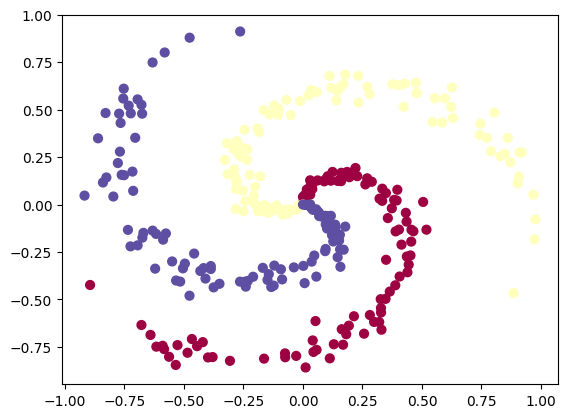

In [8]:
plt.scatter(df["x1"], df["x2"], c=df["y"], s=40, cmap=plt.cm.Spectral)
plt.show()

In [9]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
d = X.shape[1]
n = len(np.unique(y))

In [10]:
W = 0.01 * np.random.randn(d, n)
b = np.zeros((1, n))

In [14]:
# Forward propagation

Z = np.dot(X, W) + b
A = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
A

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33331017, 0.33338019, 0.33330964],
       [0.3332494 , 0.33342421, 0.33332639],
       [0.33322871, 0.33347737, 0.33329393],
       [0.33323025, 0.33352325, 0.3332465 ],
       [0.33317641, 0.33357413, 0.33324945],
       [0.33307905, 0.33360414, 0.33331681],
       [0.33306624, 0.33366457, 0.33326919],
       [0.3330677 , 0.33371857, 0.33321374],
       [0.33296912, 0.33375061, 0.33328027],
       [0.33296608, 0.33381042, 0.3332235 ],
       [0.33292548, 0.33385724, 0.33321728],
       [0.33287603, 0.33390143, 0.33322254],
       [0.33288784, 0.33395852, 0.33315364],
       [0.3327643 , 0.33398118, 0.33325453],
       [0.33266728, 0.33398026, 0.33335246],
       [0.33262577, 0.33402694, 0.33334729],
       [0.33254951, 0.33401808, 0.33343241],
       [0.33254105, 0.334118  , 0.33334095],
       [0.33243766, 0.3340357 , 0.33352664],
       [0.3323855 , 0.33404134, 0.33357316],
       [0.33240306, 0.33424172, 0.33335522],
       [0.

In [15]:
# Back propagation
def backprop(probs, y):
    # we know that dz = pi - I
    dz = probs # dz = pi
    dz[range(m),y] -= 1 # subtacting 1 where i ==j i.e. class label matches
    dz = dz/m # taking average as we have m points
    dW = np.dot(X.T, dz)
    db = np.sum(dz, axis=0, keepdims=True)
    return dW, db

In [17]:
max_iters = 500
lr = 1

m = X.shape[0]

loss_history = []

for i in range(max_iters):
    # evaluate the class probs
    z = np.dot(X, W) + b
    exp_z = np.exp(z)
    probs = exp_z/np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss: average cross-entropy loss and regularization
    error = -np.log(probs[range(m), y])
    loss = np.sum(error)/m
    loss_history.append(loss)
    if i % 100 == 0:
        print(f"iteration: {i}, loss: {loss}")


    # compute the gradient on score
    dZ = probs
    dZ[range(m),y] -= 1
    dZ = dZ/m
    dW = np.dot(X.T, dZ)
    db = np.sum(dZ, axis=0, keepdims=True)

    # perform a parameter update using gradient descent
    W += -lr * dW
    b += -lr * db
# history = pd.DataFrame({'step': list(range(max_iters)), 'loss': loss_history})
# history.plot(x='step', y='loss',xlabel='step', ylabel='loss')

iteration: 0, loss: 1.0976548561437078
iteration: 100, loss: 0.7447153791582795
iteration: 200, loss: 0.7405315234148558
iteration: 300, loss: 0.7402161185980555
iteration: 400, loss: 0.7401859840586149


In [18]:
def predict(X):
    Z = np.dot(X, W) + b
    Z_e = np.exp(Z)
    probs = Z_e/np.sum(Z_e, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

print(f"Training Accuracy {np.sum(predict(X) == y)/m}")

Training Accuracy 0.5266666666666666


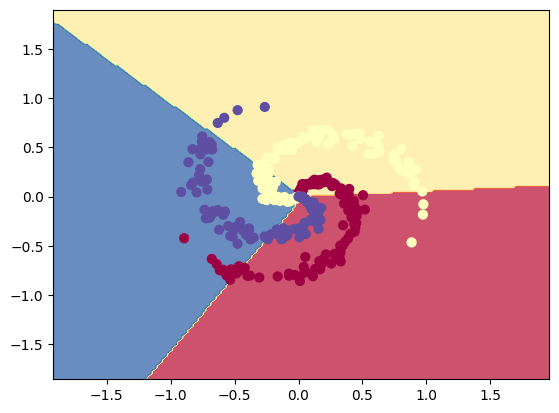

In [19]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid
y_hat = predict(np.c_[xx.ravel(), yy.ravel()]) # concatenates along second axis
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()